In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [6]:
# Create a DataFrame with the scaled data
df_scaled_data = pd.DataFrame(
    scaled_data,
    columns=df_market_data.columns,
    index=df_market_data.index
)
# Copy the crypto names from the original DataFrame


# Set the coin_id column as index


# Display the scaled DataFrame
print("\nScaled Data:")
display(df_scaled_data.head())


Scaled Data:


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [8]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=1)
# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans_model.fit(df_scaled_data)
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)


In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)



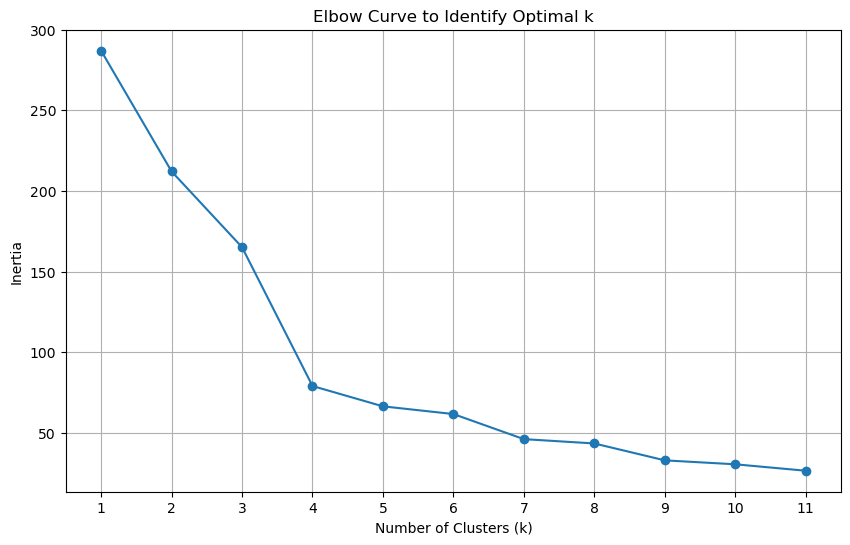

In [10]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Curve to Identify Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)  # Ensure all k values are labeled on the x-axis
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 1

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [17]:
# Initialize the K-Means model using the best value for k
optimal_k = 11
kmeans_model_optimal = KMeans(n_clusters=optimal_k, random_state=1)

In [18]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model_optimal.fit(df_scaled_data)

KMeans(n_clusters=11, random_state=1)

In [19]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_labels = kmeans_model_optimal.predict(df_scaled_data)

# Print the resulting array of cluster values.
print("Cluster Labels for Each Cryptocurrency:")
print(cluster_labels)

Cluster Labels for Each Cryptocurrency:
[ 2  2  9  9  7  2  7  2  2  9  8  9  9  7  9  0  9  0  2  9  8  2  9  9
  4  9  0  8  2  6  0  0  3  2 10  5  1  8  2  9  9]


In [20]:
# Create a copy of the scaled DataFrame
df_scaled_data_copy = df_scaled_data.copy()

# Display the first few rows of the copied DataFrame to verify
print("Copied Scaled DataFrame:")
display(df_scaled_data_copy.head())

Copied Scaled DataFrame:


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [21]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_scaled_data_copy['Cluster'] = cluster_labels

# Display the updated copy of the scaled DataFrame
print("Scaled DataFrame with Cluster Labels:")
display(df_scaled_data_copy.head())


Scaled DataFrame with Cluster Labels:


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,9
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,9
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,7


In [22]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = df_scaled_data_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',  # Color by the K-Means cluster labels
    hover_cols=['coin_id'],  # Add the crypto name to the hover information
    title='Cryptocurrency Clusters Based on Price Change',
    xlabel='24h Price Change (%)',
    ylabel='7d Price Change (%)',
    width=800,
    height=600
)

# Display the scatter plot
scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [23]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [24]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca_model.fit_transform(df_scaled_data)

df_pca = pd.DataFrame(
    pca_data,
    columns=['PC1', 'PC2', 'PC3'],  # Naming the principal components
    index=df_scaled_data.index
)

# View the scaled PCA data
print("Scaled PCA Data (3 Components):")
display(df_pca.head())

Scaled PCA Data (3 Components):


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [25]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

# Display the explained variance for each principal component
print("Explained Variance Ratio for Each Principal Component:")
for i, variance in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: {variance:.4f} ({variance * 100:.2f}%)")

Explained Variance Ratio for Each Principal Component:
Principal Component 1: 0.3720 (37.20%)
Principal Component 2: 0.3470 (34.70%)
Principal Component 3: 0.1760 (17.60%)


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [26]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(
    pca_data,
    columns=['PC1', 'PC2', 'PC3'],  # Naming the principal components
    index=df_scaled_data.index  # Use the same index from the original scaled DataFrame
)

# Copy the crypto names from the original scaled DataFrame
df_pca['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_pca.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
print("Scaled PCA DataFrame:")
display(df_pca.head())

Scaled PCA DataFrame:


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [27]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list of k-values
print("List of k-values from 1 to 11:")
print(k_values)

List of k-values from 1 to 11:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [28]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=1)
# 2. Fit the model to the data using `df_market_data_pca`
    kmeans_model.fit(df_pca)
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)


# Display the inertia values
print("Inertia values for each k:")
print(inertia_values)

Inertia values for each k:
[256.8740855678926, 182.3395300777565, 135.44240762454214, 49.66549665179738, 38.67258217591797, 34.50757653758154, 23.72836478127477, 18.5745234401832, 15.572672210433339, 11.407666572096915, 8.058821888712727]


In [29]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

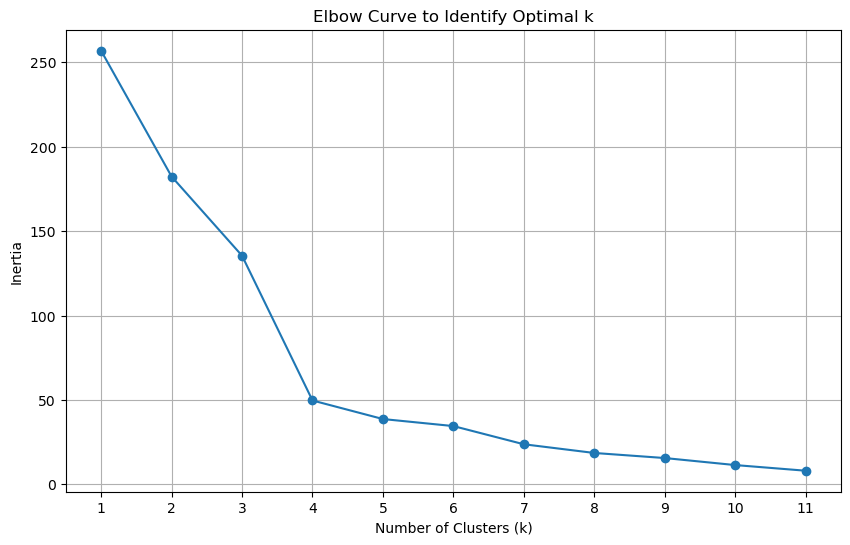

In [30]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Curve to Identify Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)  # Ensure all k values are labeled on the x-axis
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [31]:
# Initialize the K-Means model using the best value for k
optimal_k = 4 
kmeans_model_optimal = KMeans(n_clusters=optimal_k, random_state=1)

In [32]:
# Fit the K-Means model using the PCA data
kmeans_model_optimal.fit(df_pca)

KMeans(n_clusters=4, random_state=1)

In [33]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
predicted_clusters = kmeans_model_optimal.predict(df_pca)

# Print the resulting array of cluster values.
print("Predicted Cluster Labels:")
print(predicted_clusters)

Predicted Cluster Labels:
[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [34]:
# Create a copy of the scaled PCA DataFrame
df_pca_copy = df_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_copy['Cluster'] = predicted_clusters

# Display the copy of the scaled PCA DataFrame
print("\nPCA DataFrame with Predicted Clusters:")
display(df_pca_copy.head())


PCA DataFrame with Predicted Clusters:


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [35]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = df_pca_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',  # Color by the K-Means cluster labels
    hover_cols=['coin_id'],  # Add the crypto name to the hover information
    title='Cryptocurrency Clusters Based on PCA Components',
    xlabel='Principal Component 1',
    ylabel='Principal Component 2',
    width=800,
    height=600
)

# Display the scatter plot
scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [36]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!
inertia_values_before_pca = inertia_values  # Inertia values from the original data
inertia_values_after_pca = inertia_values   # Re-compute if needed after PCA

# Create a dictionary for the Elbow curve data before PCA
elbow_data_before_pca = {
    "k": k_values,
    "inertia": inertia_values_before_pca
}

# Create a dictionary for the Elbow curve data after PCA
elbow_data_after_pca = {
    "k": k_values,
    "inertia": inertia_values_after_pca
}

# Create DataFrames for both Elbow curves
df_elbow_before_pca = pd.DataFrame(elbow_data_before_pca)
df_elbow_after_pca = pd.DataFrame(elbow_data_after_pca)

# Plot the Elbow curves before and after PCA
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [31]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 